<a href="https://colab.research.google.com/github/deepsh7991/Data-sicence-projects/blob/main/Admission_Chance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import numpy
import pandas
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense ,Dropout,BatchNormalization
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Any results you write to the current directory are saved as output.

C:\Users\Sasmita\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df=pd.read_csv("Admission_Predict.csv")
#changing names because previous names are little bit confusing
df=df.rename(index=str, columns={"GRE Score": "GRE", "TOEFL Score": "TOEFL", "Chance of Admit ": "Admission_Chance"})
#we donot need serial number so its good to drop it because its just a number
df=df.drop("Serial No.",axis=1)
df.head(10)

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Admission_Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


In [ ]:
df.describe()

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Admission_Chance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [ ]:
admit=np.asarray(df["Admission_Chance"])
len(np.unique(admit))
#we have 60 different values in the coloum [chance to predict]

60

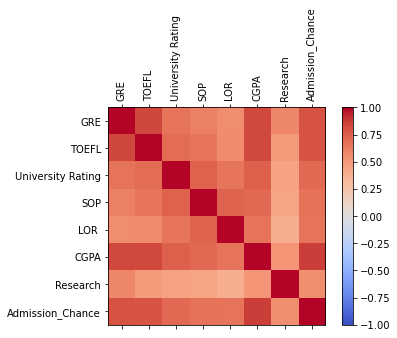

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

<AxesSubplot:>

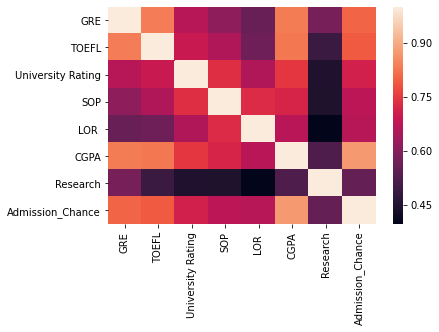

In [ ]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

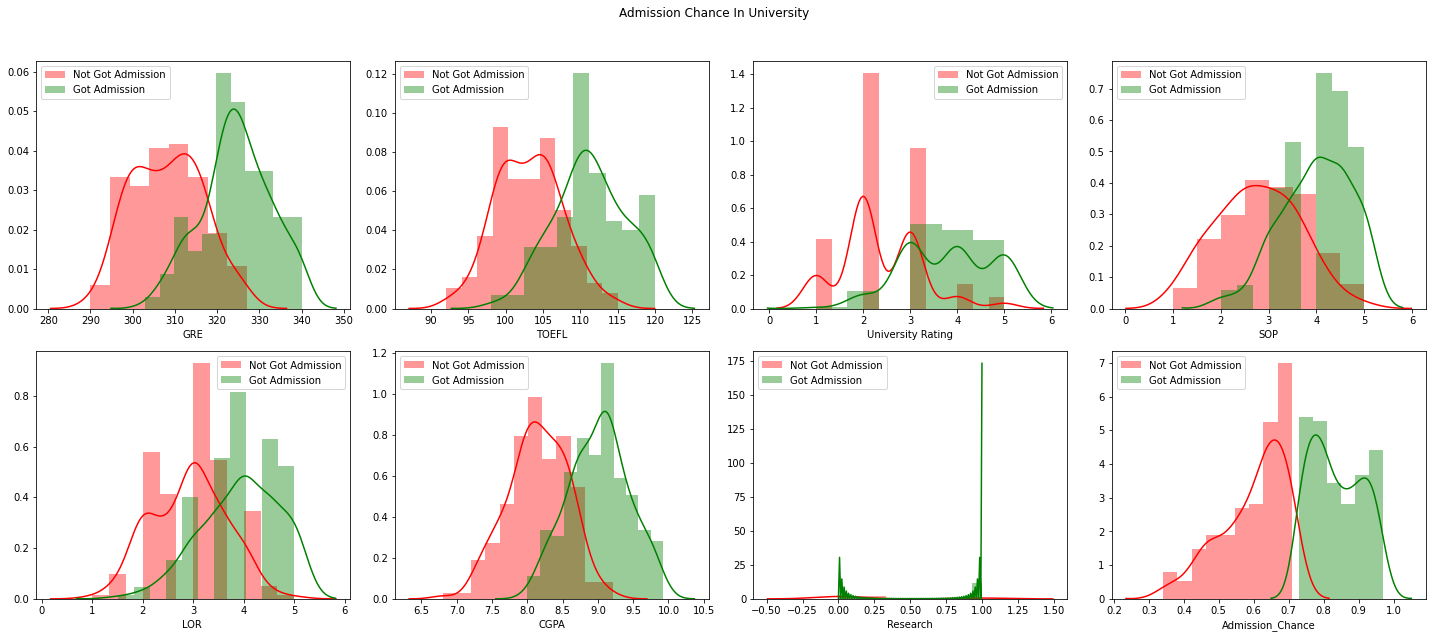

In [ ]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in df.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(df[i][df['Admission_Chance']<0.72], color='r', label = 'Not Got Admission')
    sns.distplot(df[i][df['Admission_Chance']>0.72], color='g', label = 'Got Admission')
    plt.legend(loc='best')
fig.suptitle('Admission Chance In University ')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

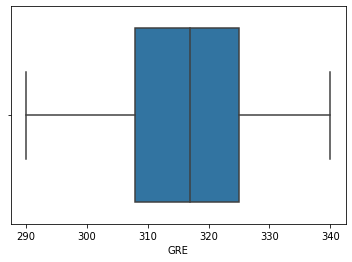

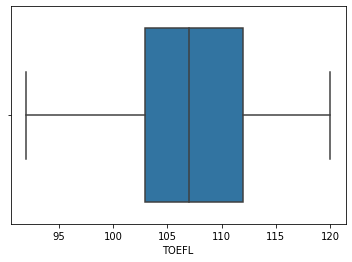

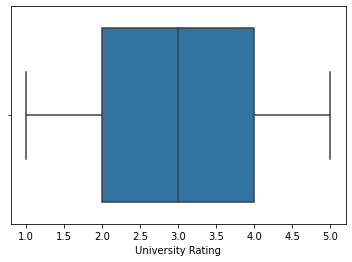

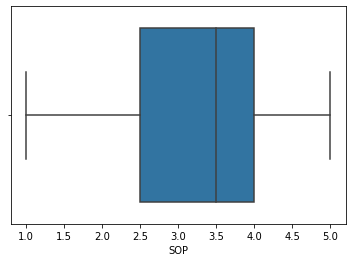

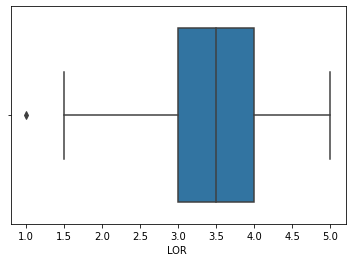

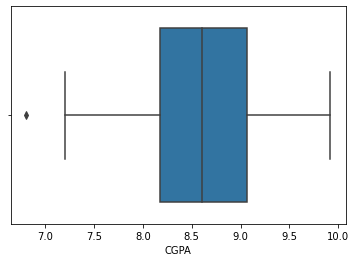

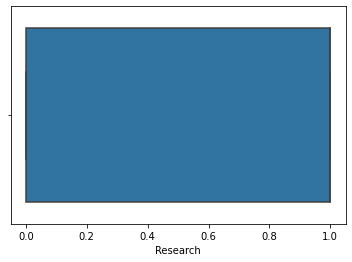

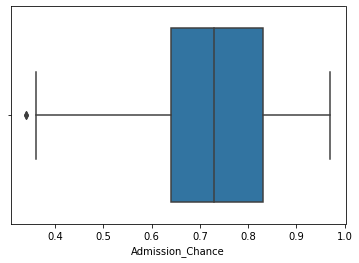

In [ ]:
for column in df:
    plt.figure()
    sns.boxplot(x=df[column])

**thats good we have no outliers**

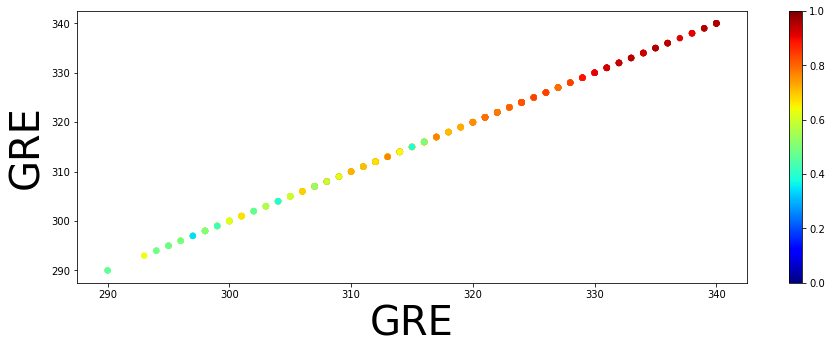

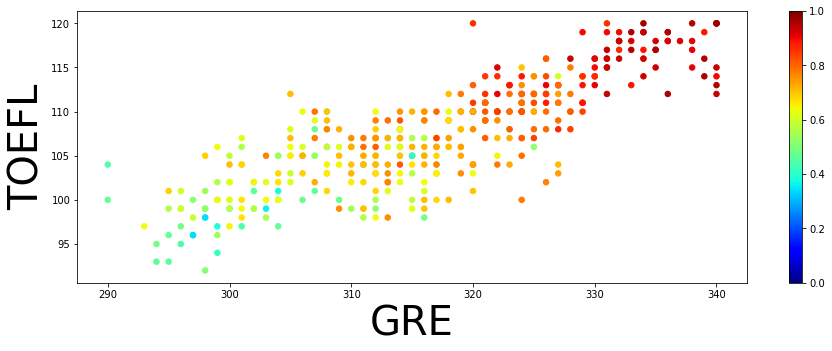

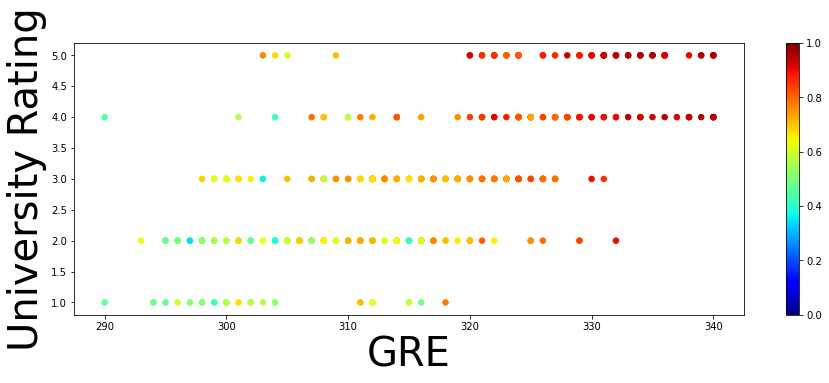

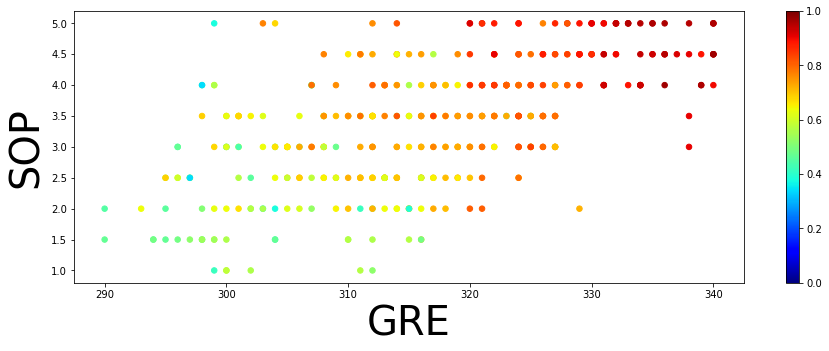

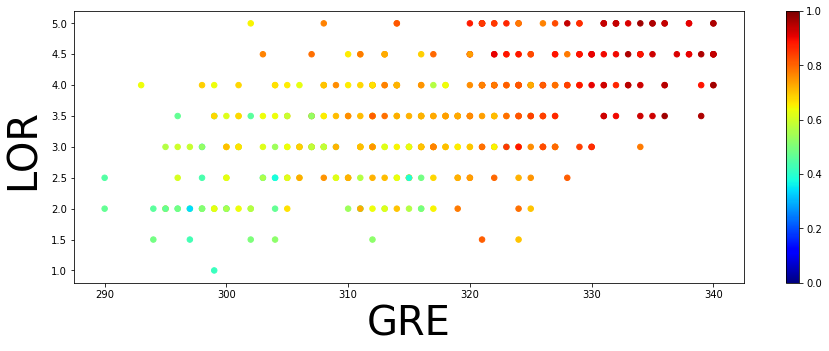

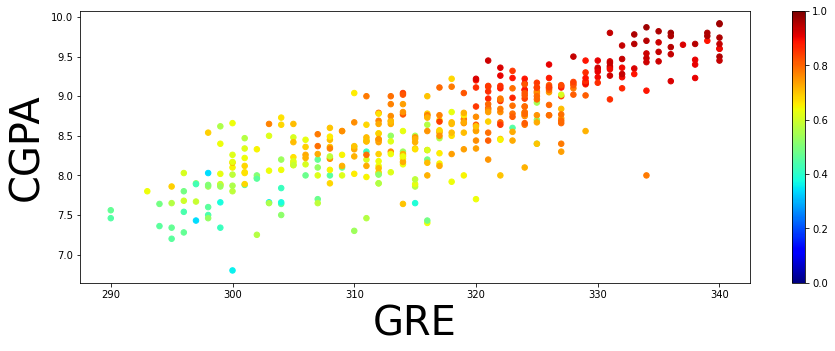

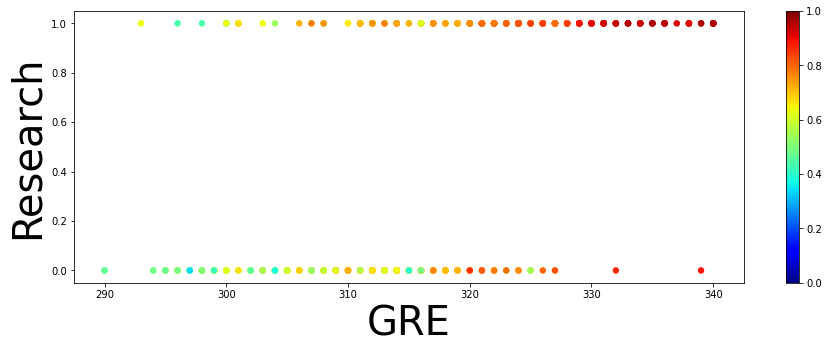

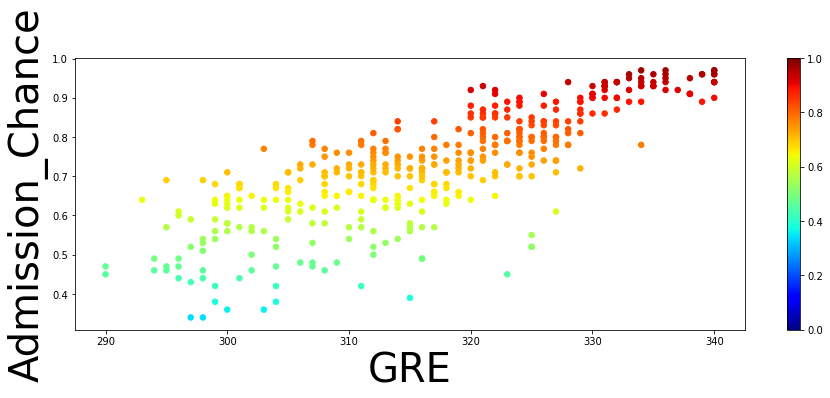

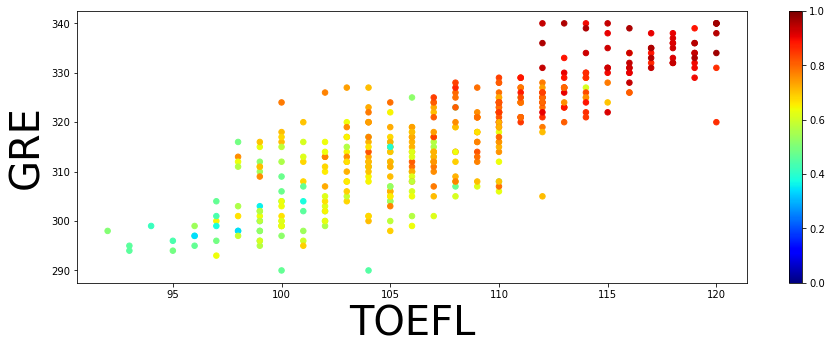

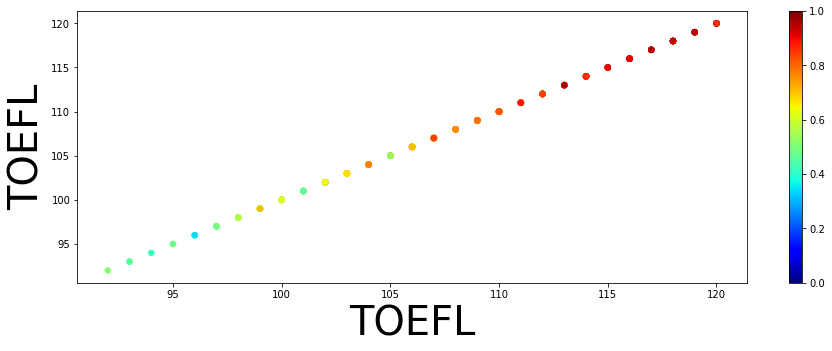

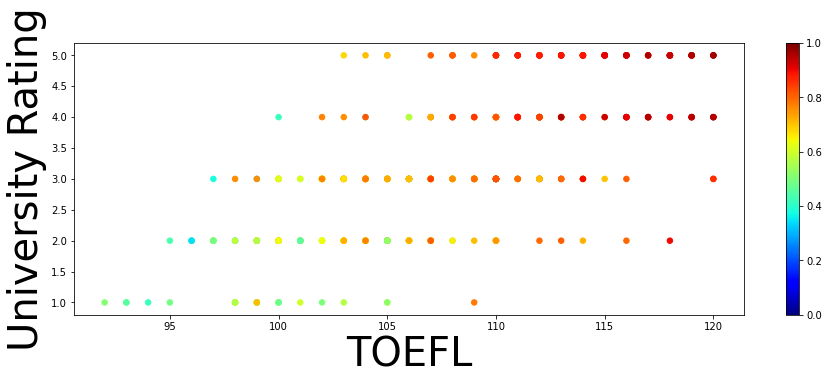

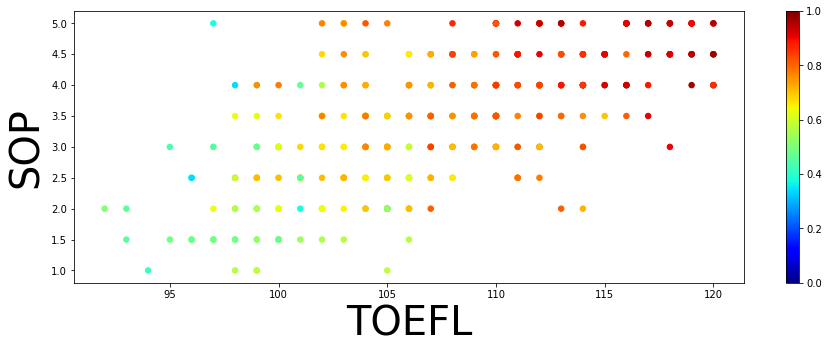

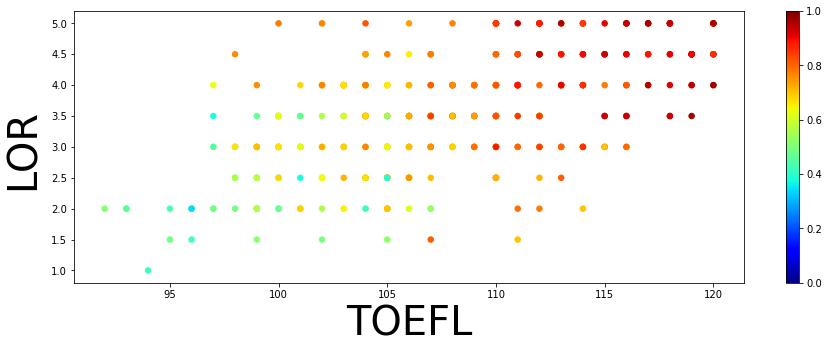

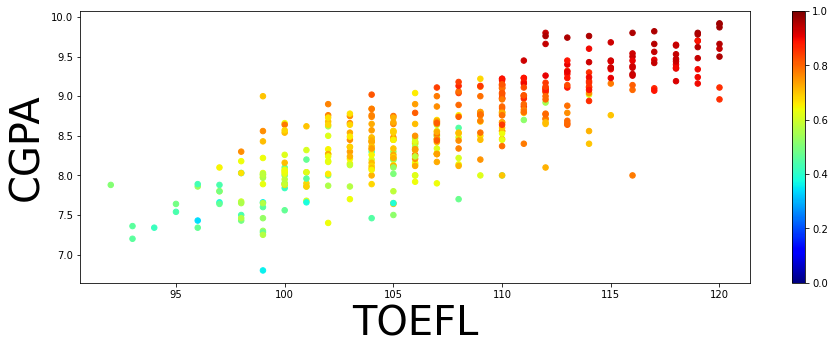

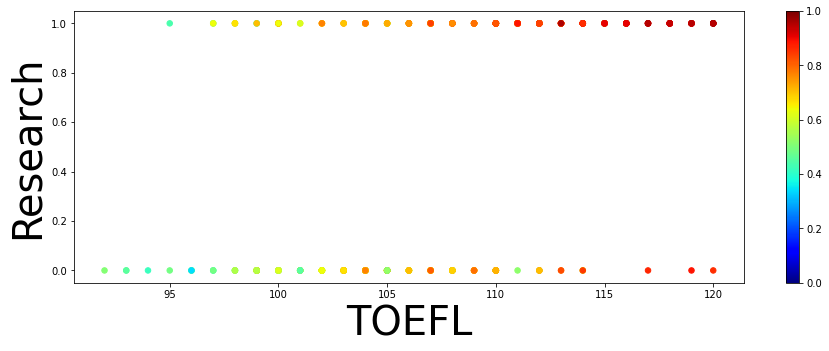

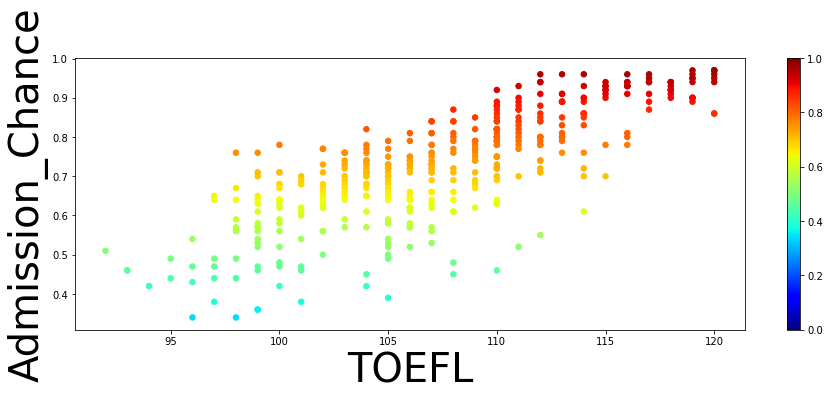

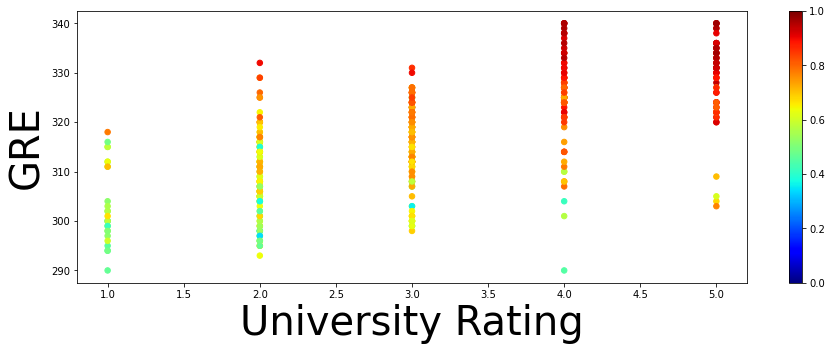

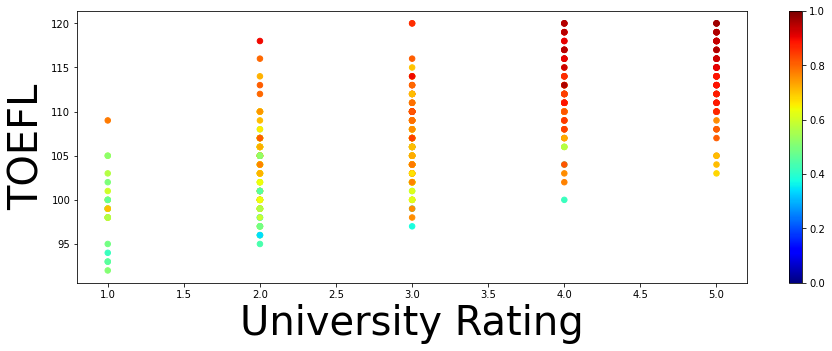

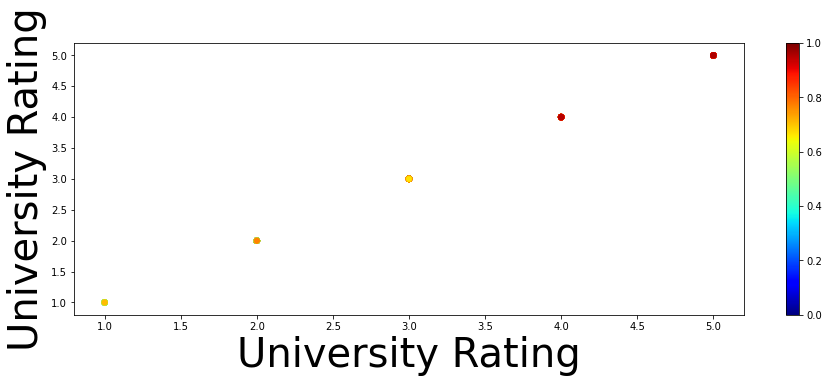

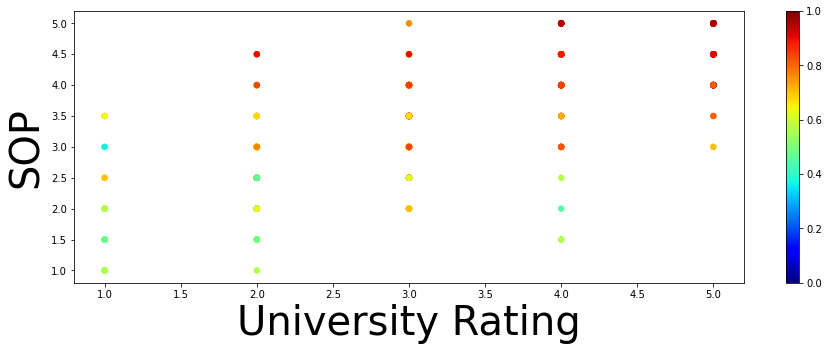

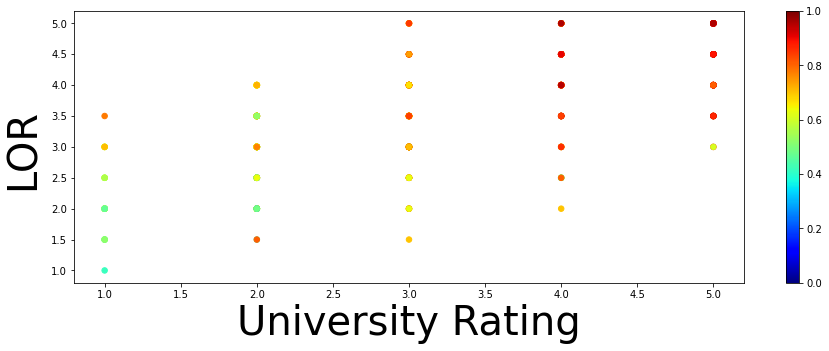

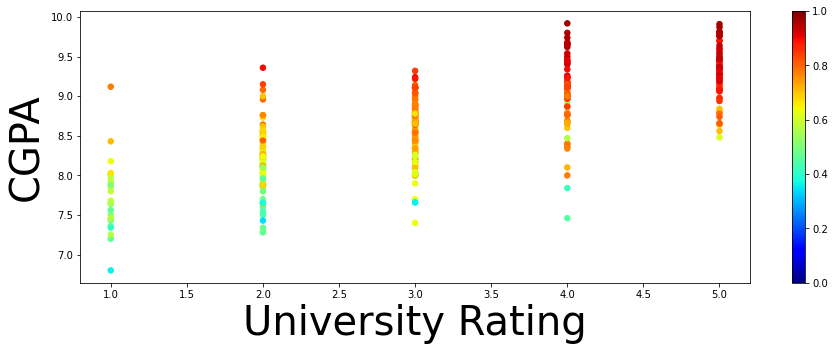

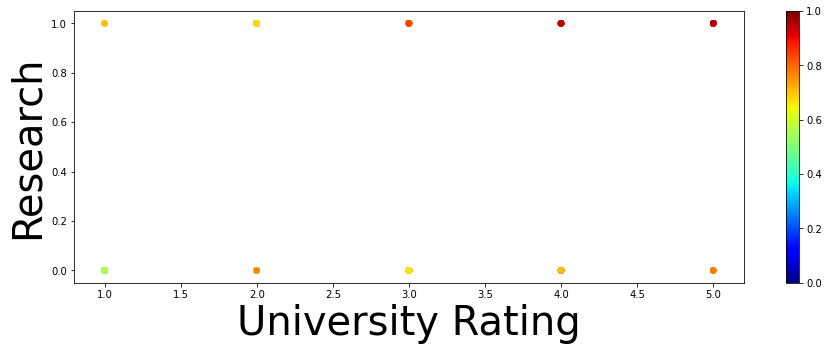

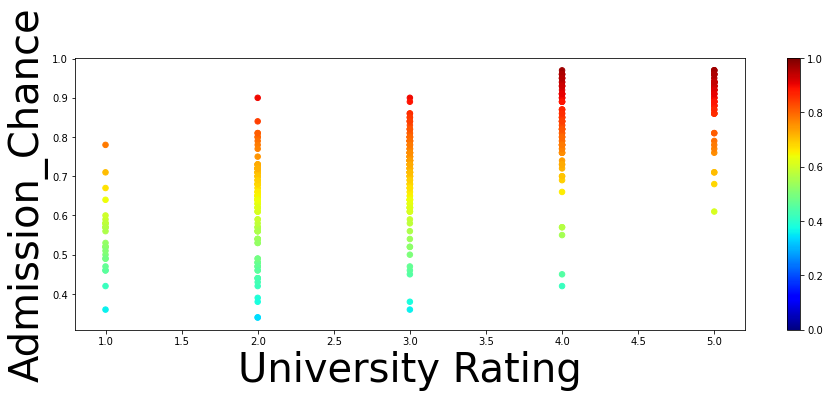

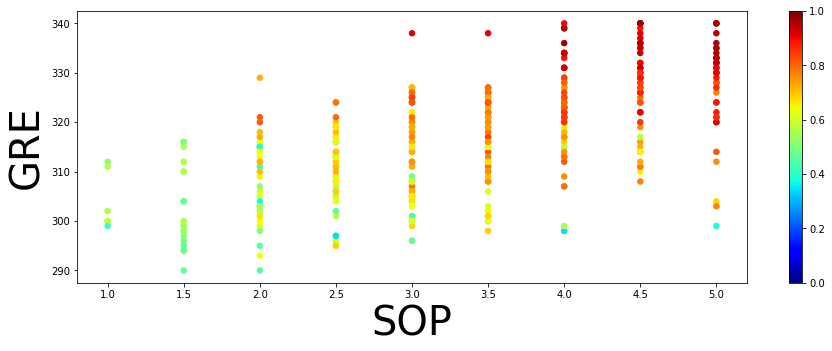

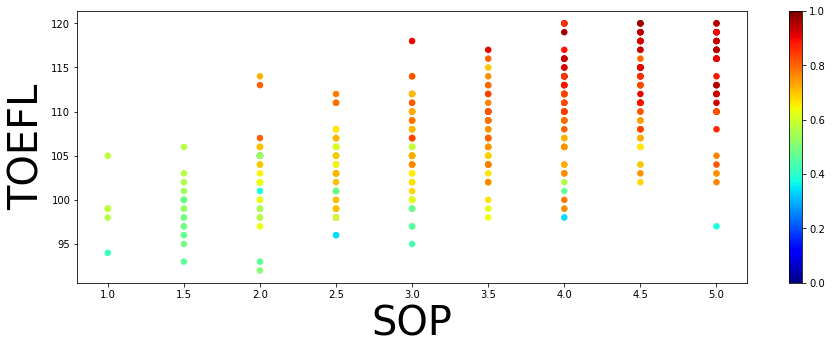

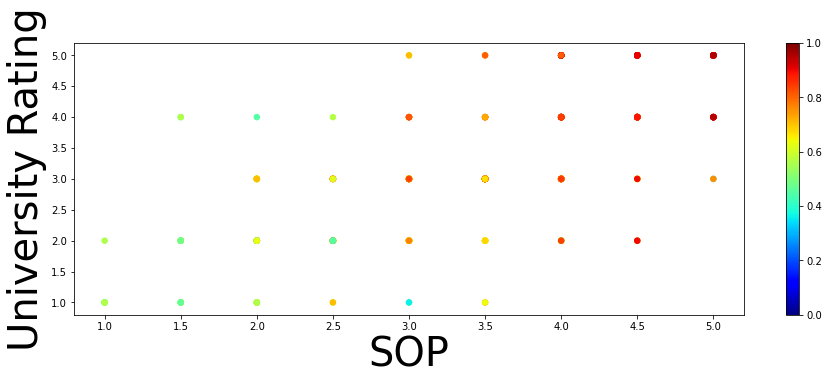

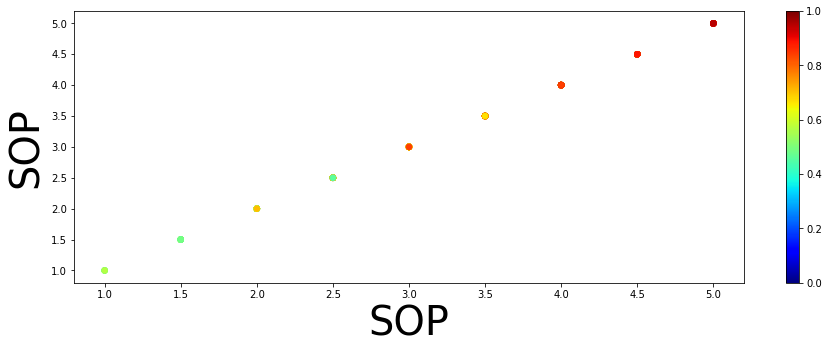

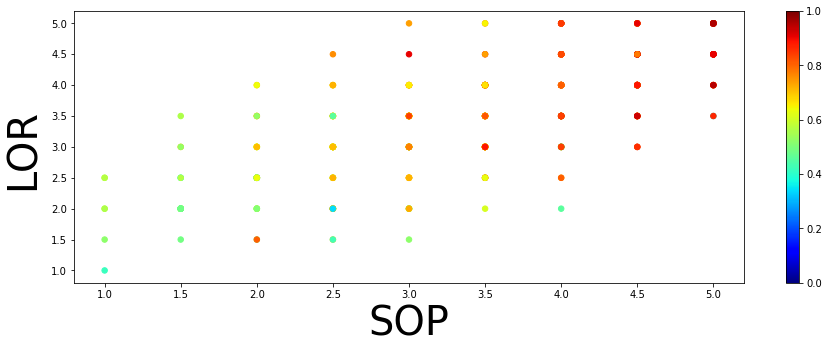

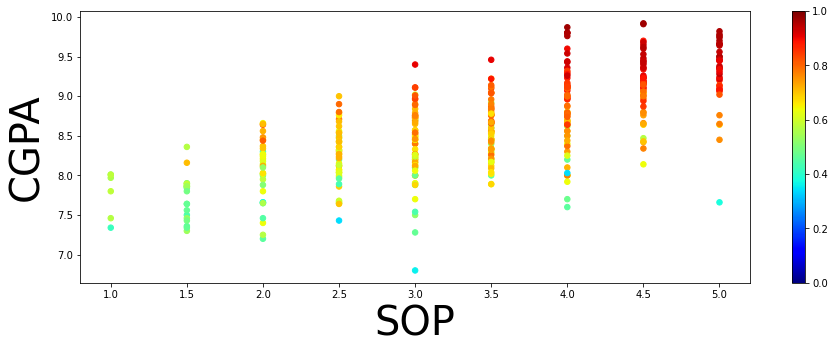

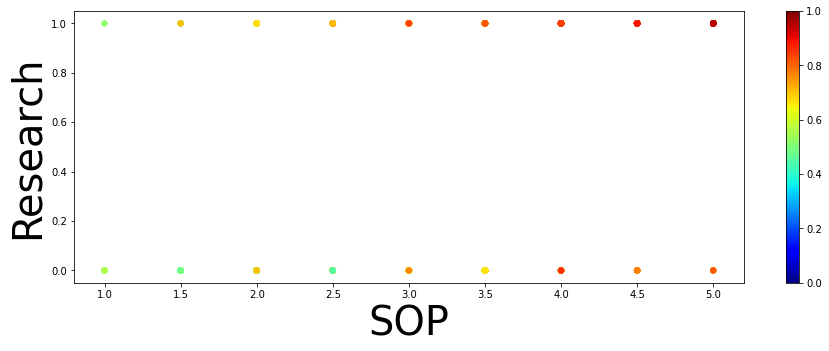

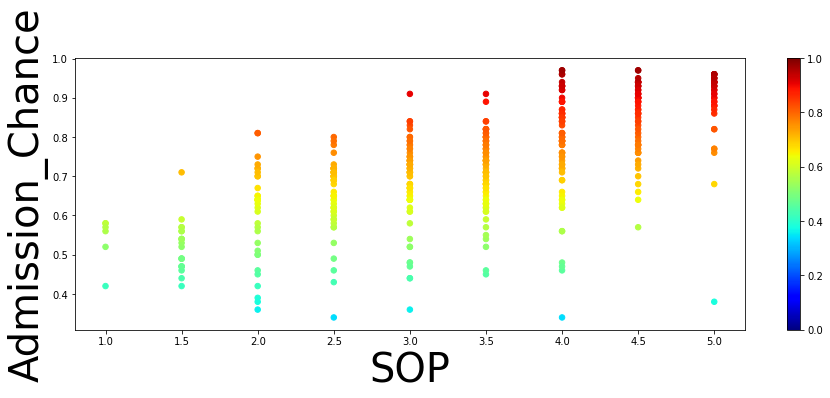

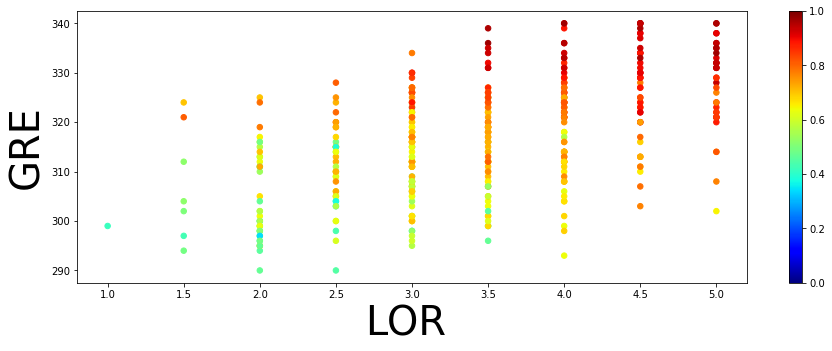

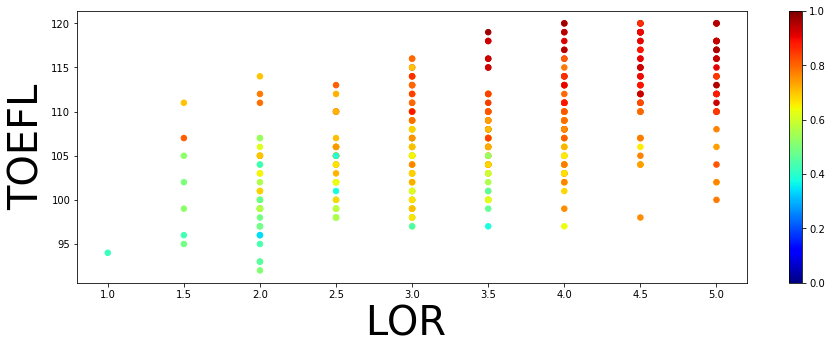

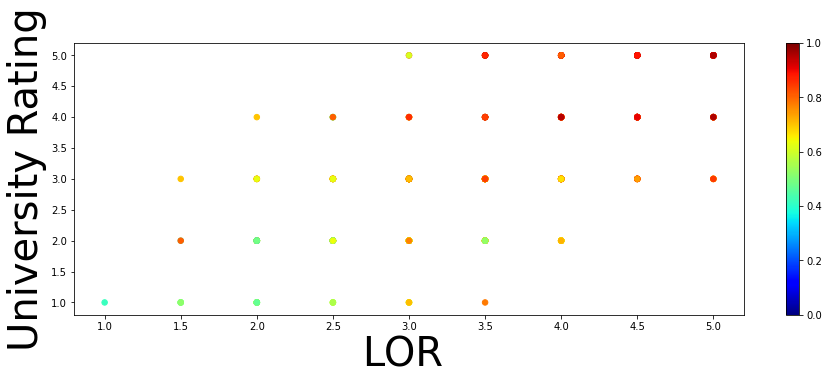

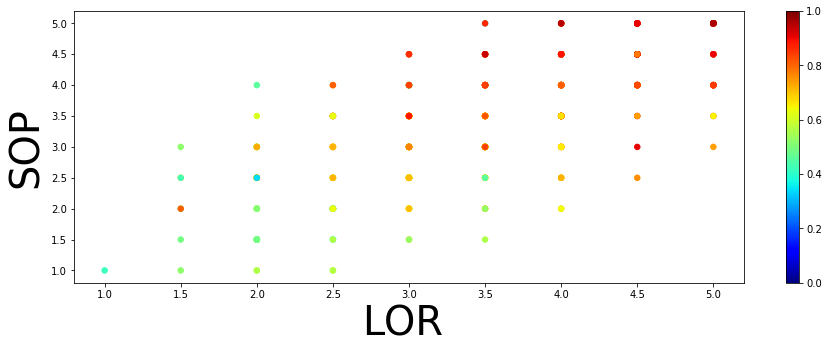

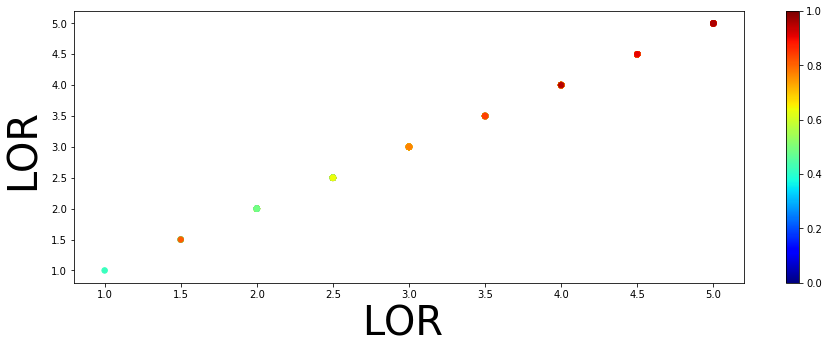

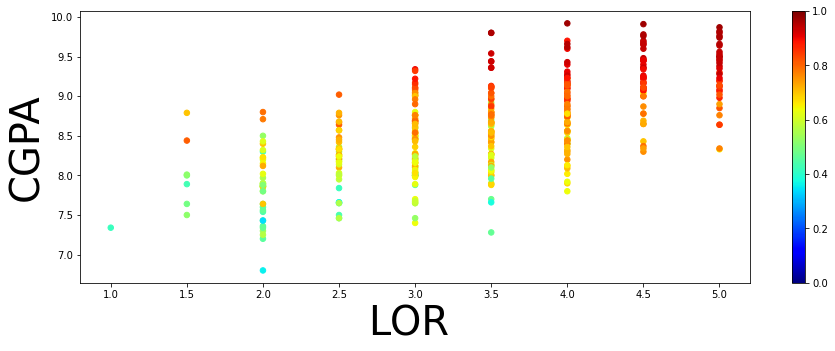

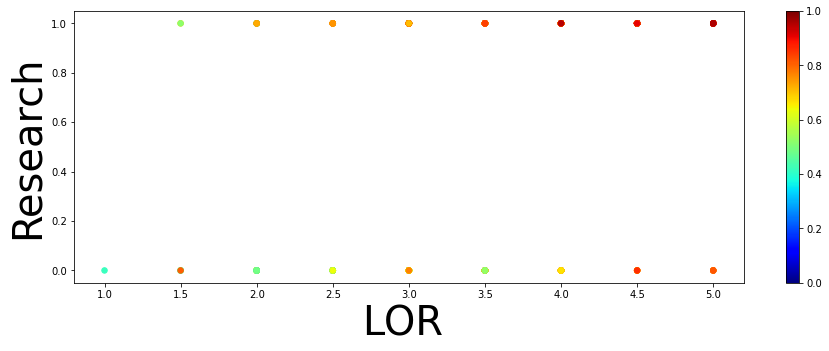

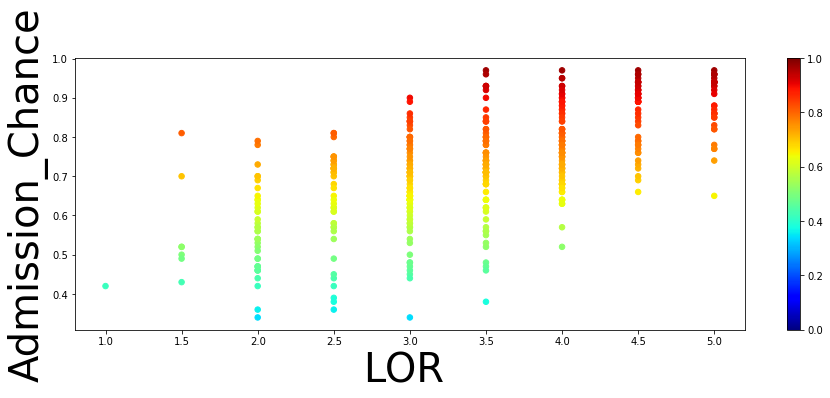

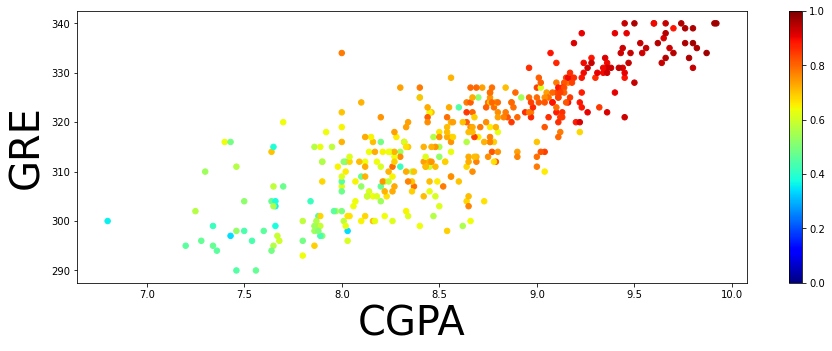

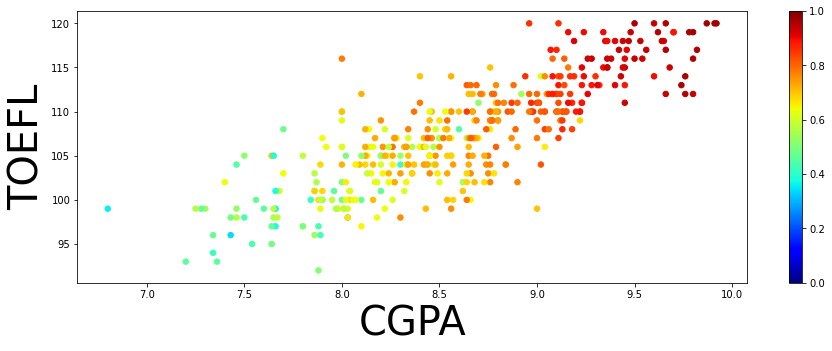

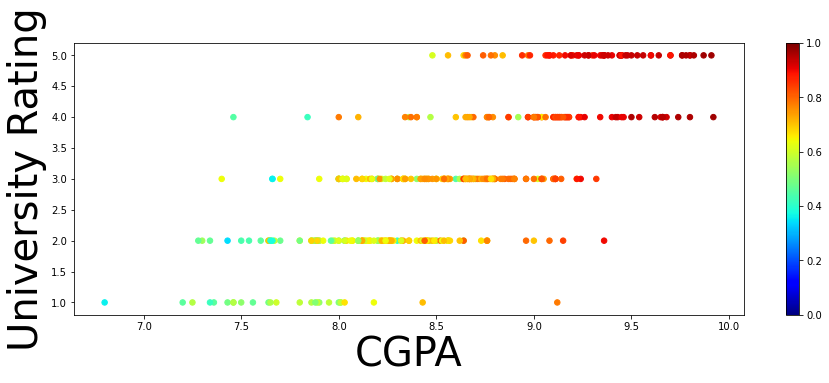

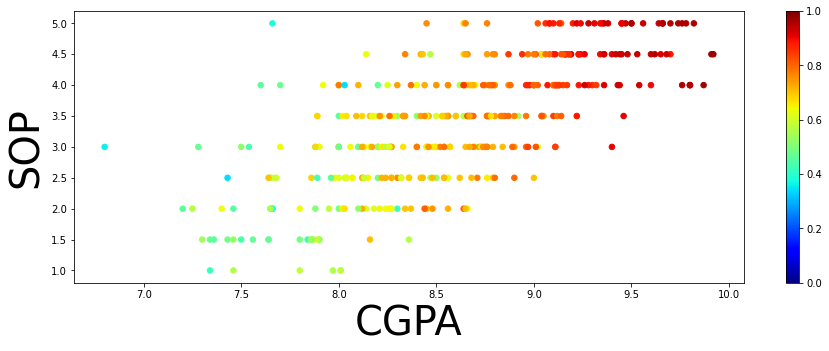

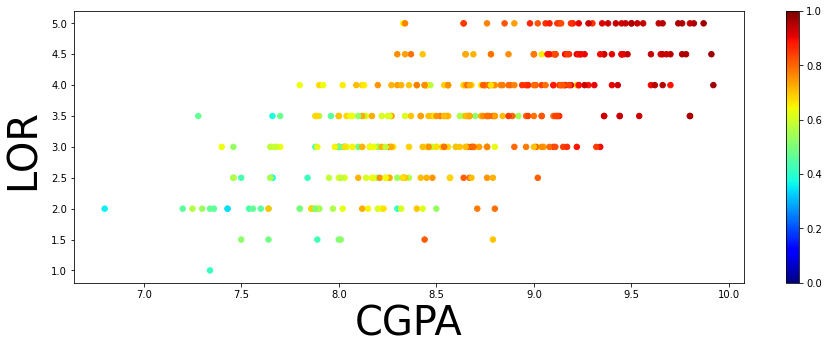

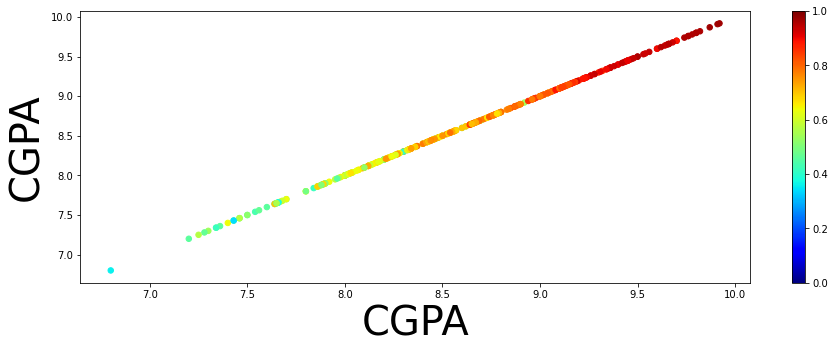

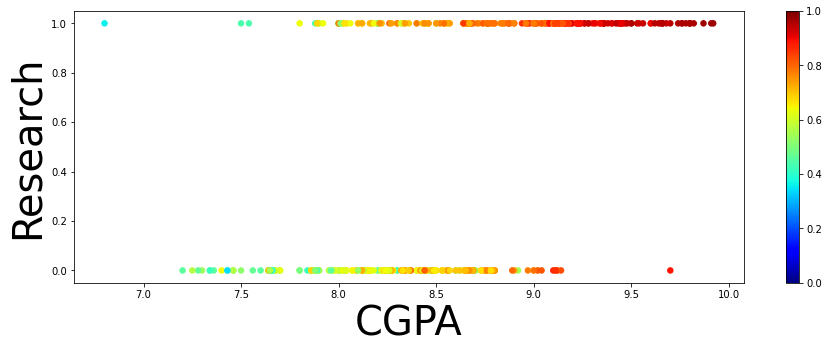

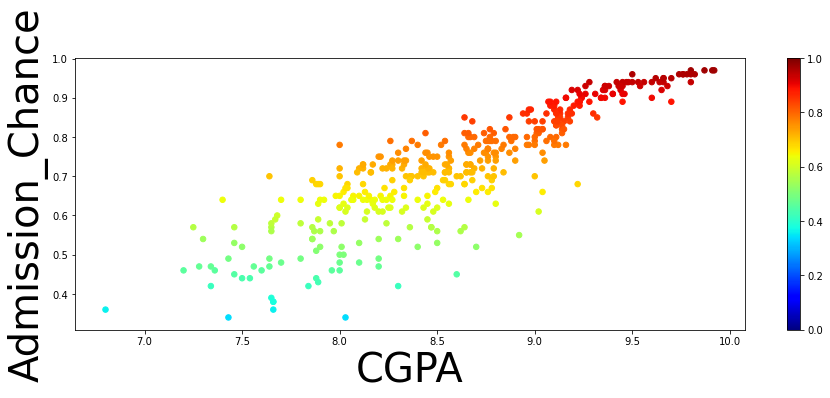

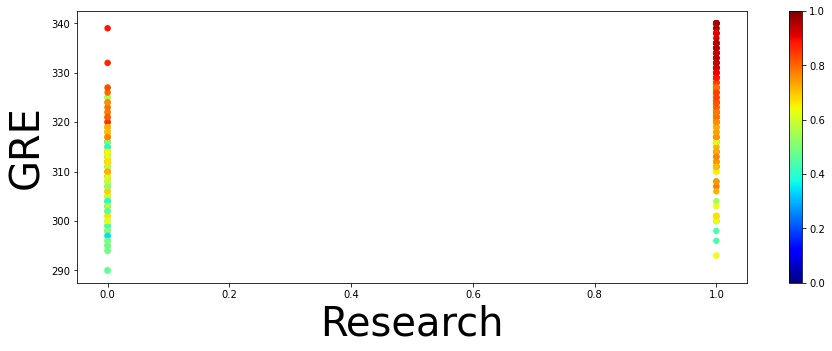

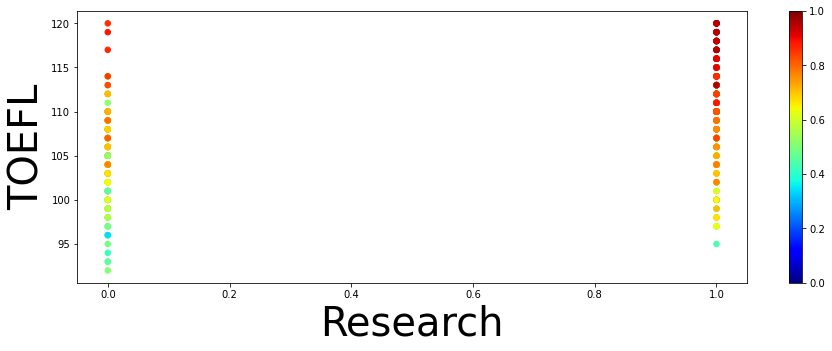

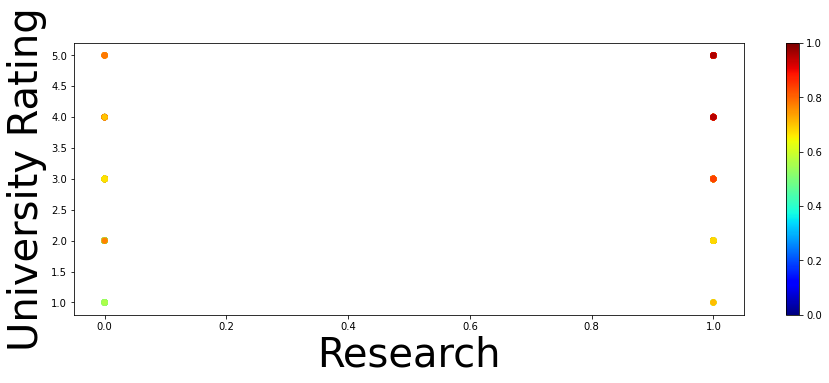

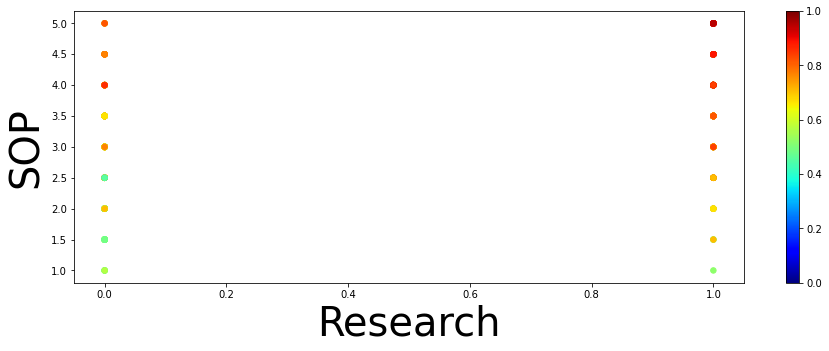

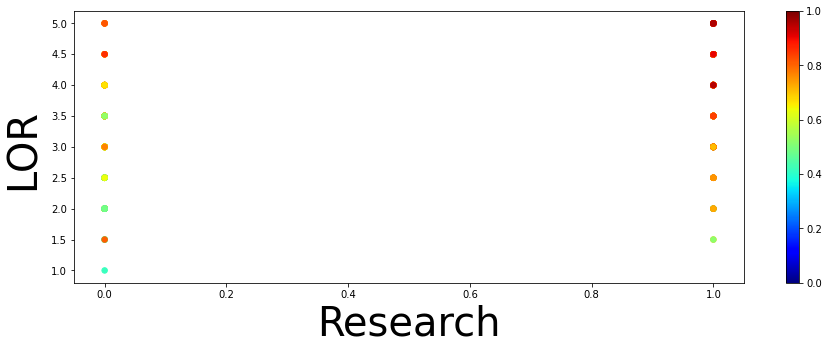

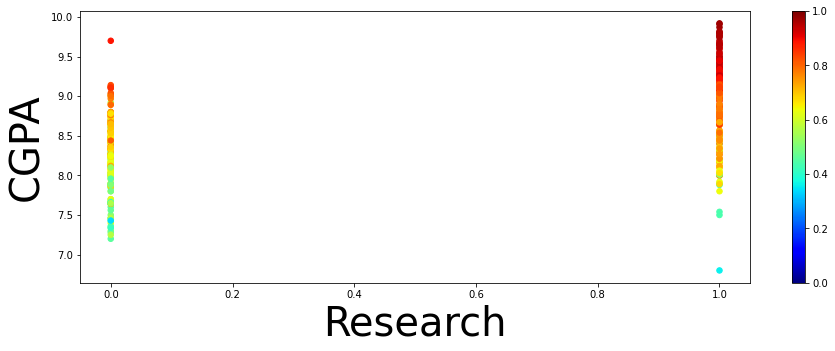

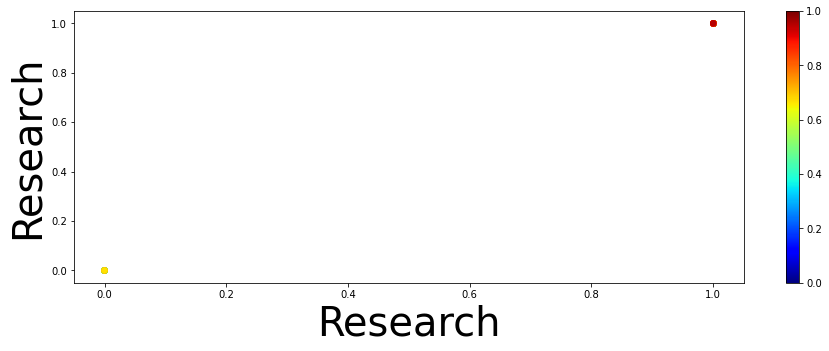

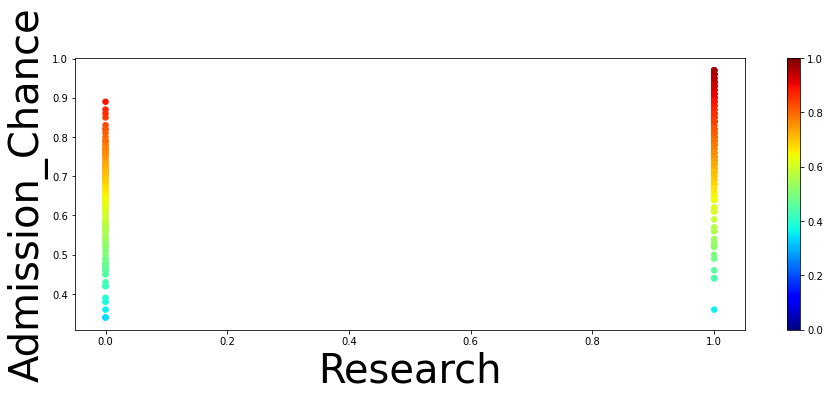

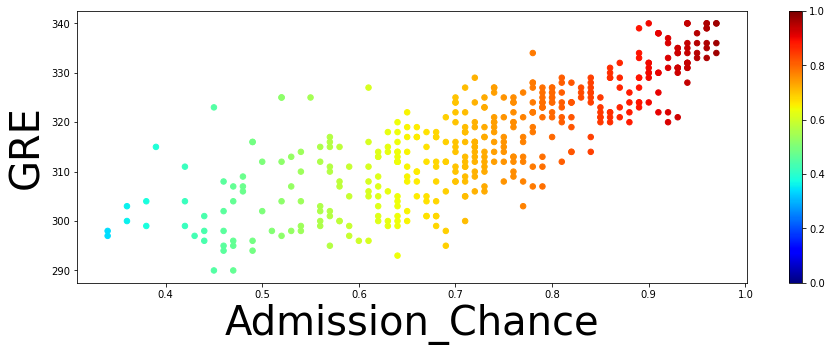

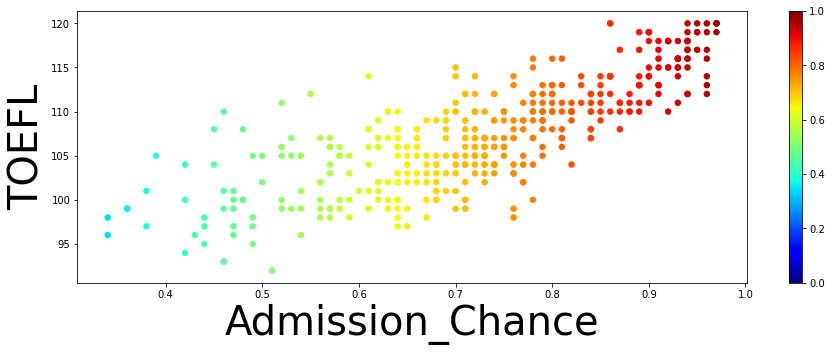

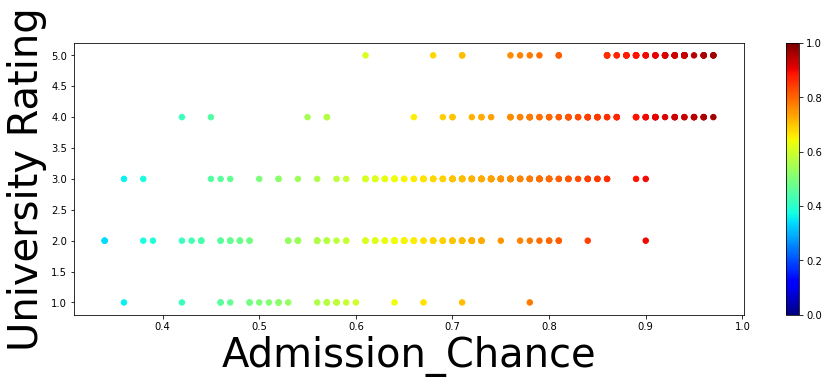

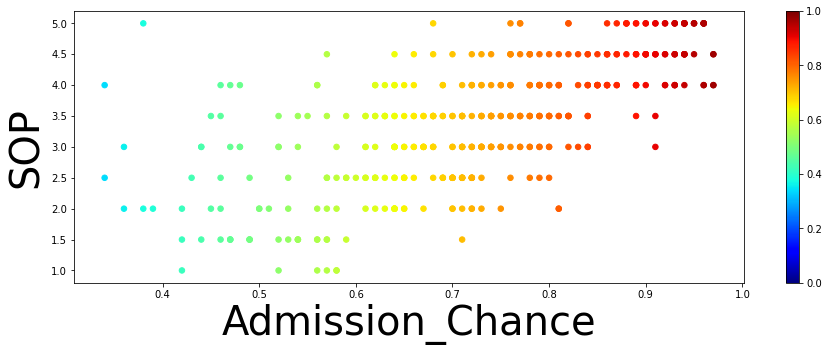

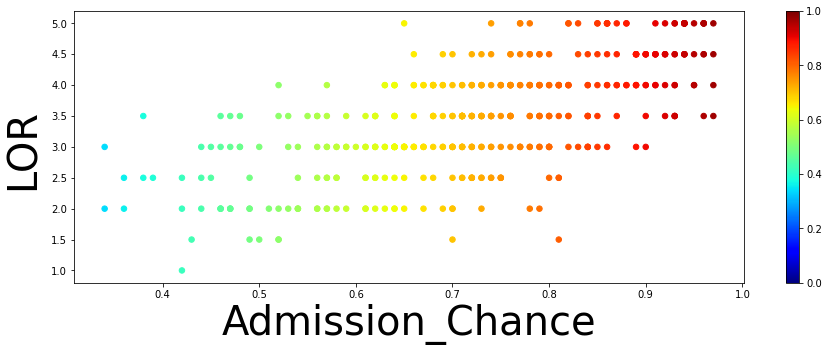

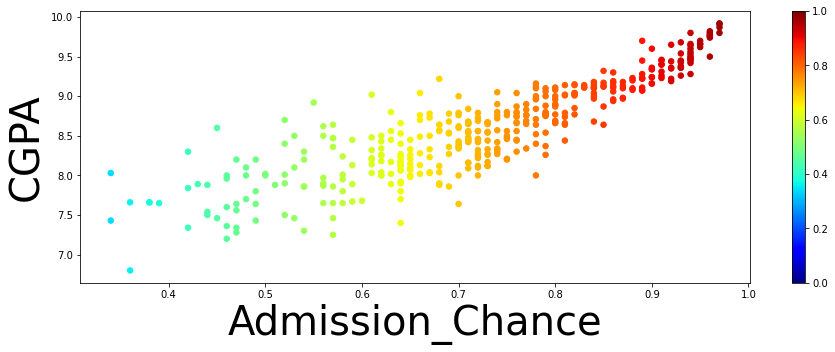

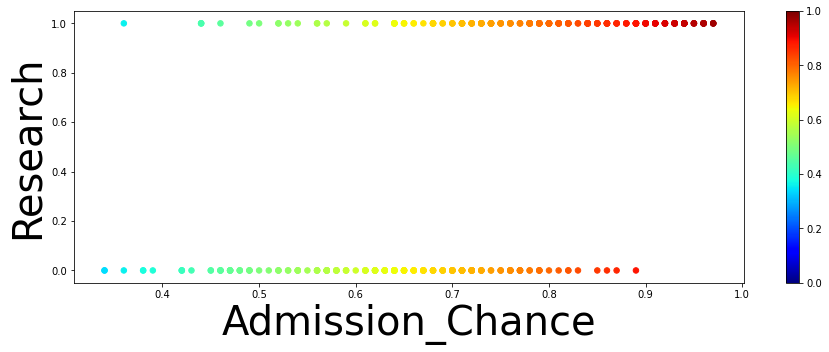

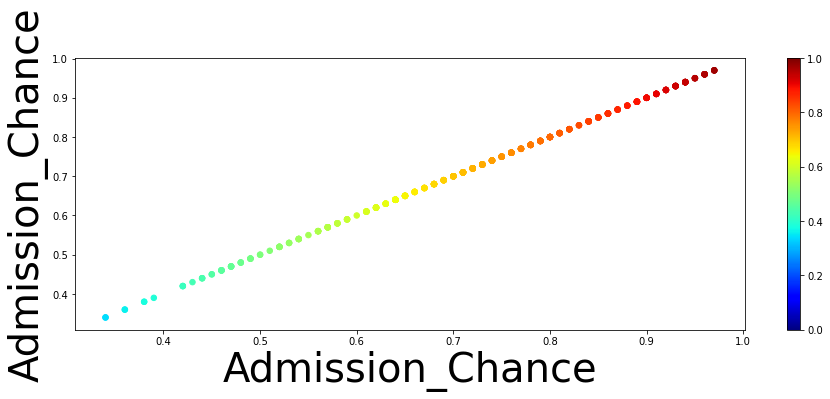

In [ ]:
for column_1st in df:
    for coloum_2nd in df:
        jet=plt.get_cmap('jet')
        plt.figure(figsize=(15,5))
        plt.scatter(df[column_1st], df[coloum_2nd], s=30, c=df['Admission_Chance'], vmin=0, vmax=1, cmap=jet)
        plt.xlabel(column_1st,fontsize=40)
        plt.ylabel(coloum_2nd,fontsize=40)
        plt.colorbar()
        plt.show()

### Modeling

In [ ]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    
    
    
    model.add(Dense(12, input_dim=7, activation='relu'))
    
   
    # 4 Neurons (Play around with this number!)
    model.add(Dense(11, activation='relu'))
    # One final output of y, so only 1 neuron
      
    
    
    model.add(Dense(1))
    # Compile model
    print(model.summary())
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
X=np.asarray(df.drop("Admission_Chance",axis=1))
Y=np.asarray(df["Admission_Chance"])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
     X,Y, test_size=0.2, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [ ]:

estimator = KerasRegressor(build_fn=baseline_model, epochs=30, batch_size=3, verbose=1)

**For Checking our Model that it is not General we are using Kfolds**

In [ ]:
history=estimator.fit(X_train,y_train)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                96        
_________________________________________________________________
dense_1 (Dense)              (None, 11)                143       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 12        
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
107/107 [==============================] - 1s 854us/step - loss: 0.3405
Epoch 2/30
107/107 [==============================] - 0s 986us/step - loss: 0.0152
Epoch 3/30
107/107 [==============================] - 0s 923us/step - loss: 0.0084
Epoch 4/30
107/107 [==============================] - 0s 997us/step - loss: 0.0061
Epoch 5/30
107/107 [==============================]

In [ ]:
history.history

{'loss': [0.18852511048316956,
  0.013013261370360851,
  0.008008199743926525,
  0.006693698465824127,
  0.006210207007825375,
  0.005820792634040117,
  0.005709853954613209,
  0.0054394942708313465,
  0.005350780673325062,
  0.005189838819205761,
  0.005081888288259506,
  0.004992530215531588,
  0.00479696411639452,
  0.004831445403397083,
  0.004673319403082132,
  0.004547044634819031,
  0.004569066688418388,
  0.004548435099422932,
  0.004347224719822407,
  0.004539997782558203,
  0.004383362829685211,
  0.004311703145503998,
  0.004299969878047705,
  0.004248619545251131,
  0.004158805590122938,
  0.004325272515416145,
  0.004108979366719723,
  0.004136572126299143,
  0.004187579266726971,
  0.004025387577712536]}

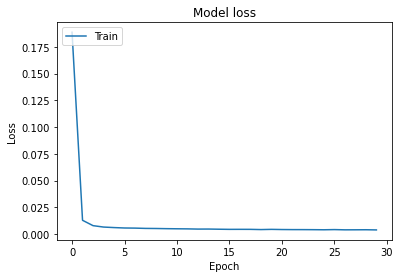

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
prediction = estimator.predict(X_test)


27/27 [==============================] - 0s 652us/step


In [ ]:

train_error =  np.abs(y_test - prediction)
mean_error = np.mean(train_error)
min_error = np.min(train_error)
max_error = np.max(train_error)
std_error = np.std(train_error)



In [ ]:
print("std_error: ",std_error)
print("mean_error: ",mean_error)
print("min_error: ",min_error)
print("max_error: ",max_error)

std_error:  0.05335051334057762
mean_error:  0.05370078574120999
min_error:  8.641481399540574e-05
max_error:  0.2280180263519287


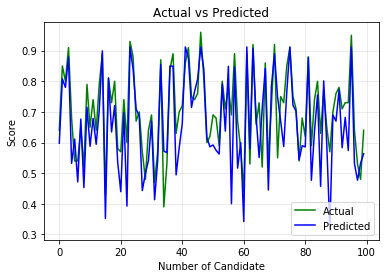

In [ ]:
#Visualising the Acutal and predicted Result
plt.plot(y_test, color = 'green', label = 'Actual')
plt.plot(prediction, color = 'blue', label = 'Predicted')
plt.grid(alpha = 0.3)
plt.xlabel('Number of Candidate')
plt.ylabel('Score')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test,prediction))
print("real value of y_test[1]: " + str(y_test[1]) + " -> the predict: " + str(estimator.predict(X_test[[1],:])))
print("real value of y_test[2]: " + str(y_test[2]) + " -> the predict: " + str(estimator.predict(X_test[[2],:])))

train_prediction = estimator.predict(X_train)
print("r_square score (train dataset): ", r2_score(y_train,train_prediction))

r_square score:  0.5475697769481596
1/1 [==============================] - 0s 1ms/step
real value of y_test[1]: 0.85 -> the predict: 0.80769974
1/1 [==============================] - 0s 893us/step
real value of y_test[2]: 0.8 -> the predict: 0.7800562
400/400 [==============================] - 0s 258us/step
r_square score (train dataset):  0.8357390504554201
